In [28]:
import math
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv(r"C:\Users\Anand\Desktop\ML\individual_data\Walmart_Sales.csv")

In [3]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [4]:
data.head(-1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667


In [5]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


C:\Users\Anand\AppData\Local\Temp\ipykernel_13832\105811470.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,x=data[col], ax=axes[idx])
C:\Users\Anand\AppData\Local\Temp\ipykernel_13832\105811470.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,x=data[col], ax=axes[idx])
C:\Use

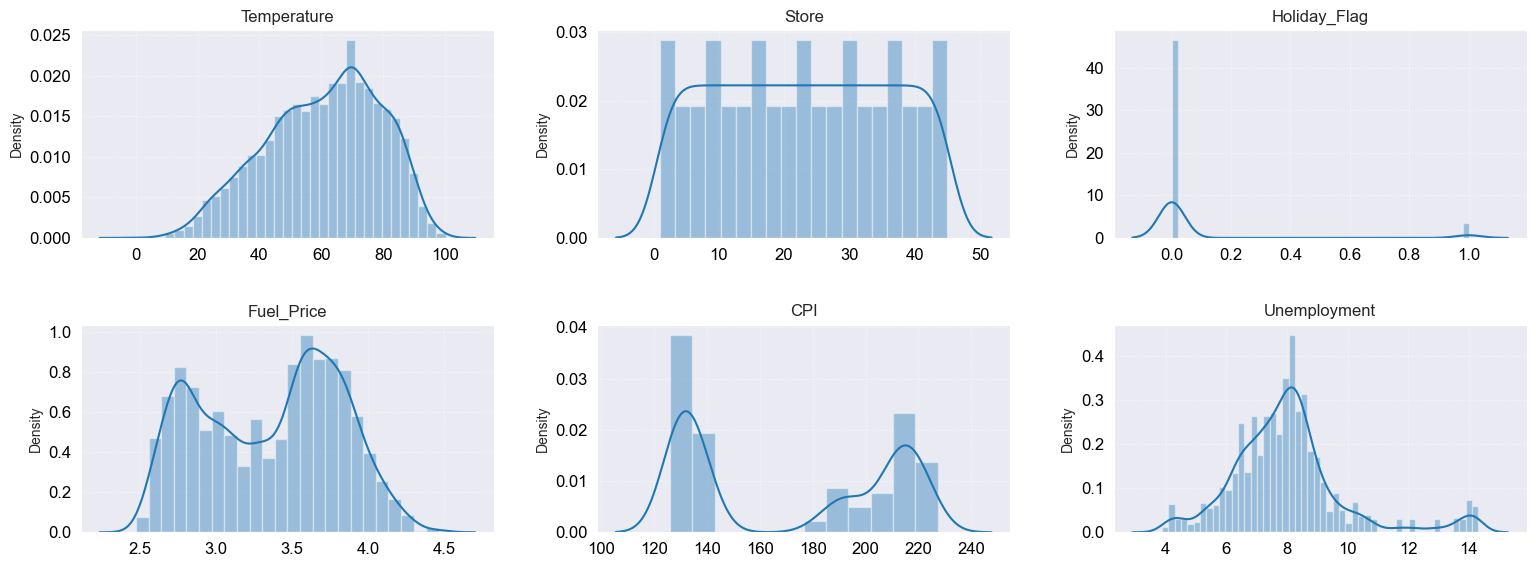

In [7]:
num_col=3
num_feature=len(data.columns)
num_row=math.ceil(num_feature/num_col)

fig,axes=plt.subplots(num_col,num_row,figsize=(16,num_row*3))
axes=axes.flatten()
columns=["Temperature","Store","Holiday_Flag","Fuel_Price","CPI","Unemployment"]
for idx, col in enumerate(columns):
    if  col=="Date":
         continue
    sns.distplot(data,x=data[col], ax=axes[idx])
    axes[idx].set_title( col)
    axes[idx].grid(True, linestyle=':', alpha=0.6)
    axes[idx].tick_params(axis='both', which='major', labelsize=12, colors='black') 

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout(pad=3)

plt.show()

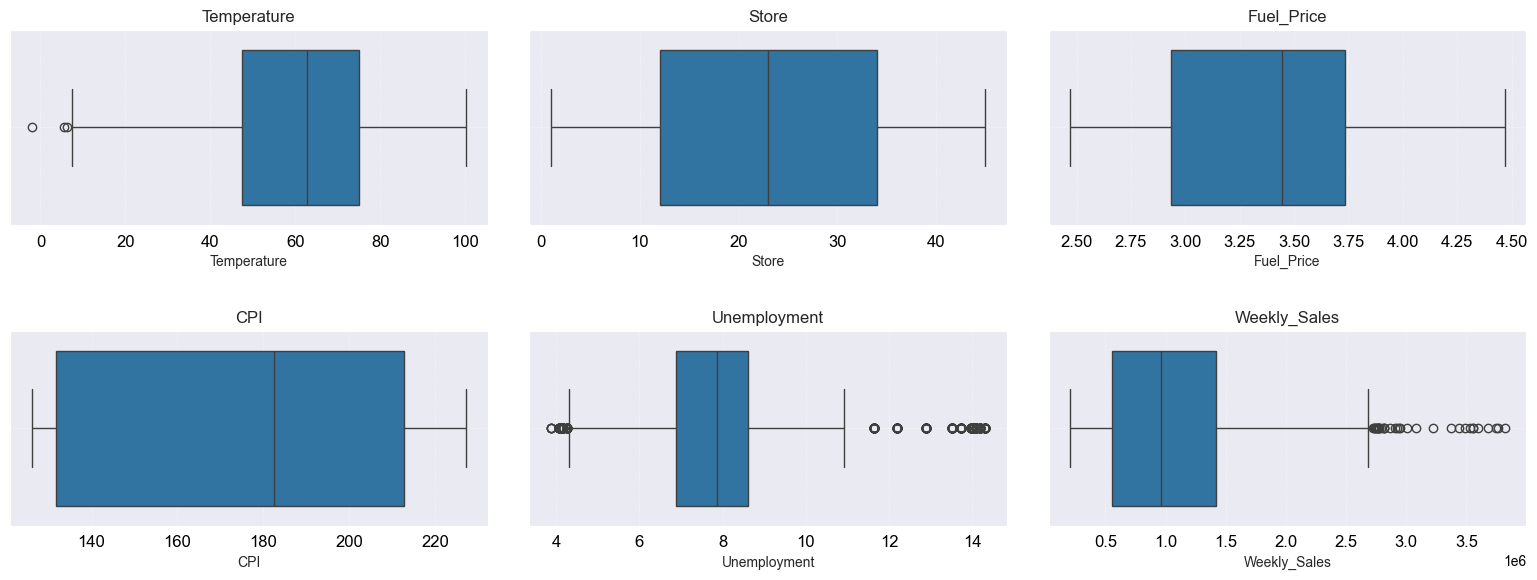

In [8]:
fig,axes=plt.subplots(num_col,num_row,figsize=(16,num_row*3))
axes=axes.flatten()
columns=["Temperature","Store","Fuel_Price","CPI","Unemployment","Weekly_Sales"]
for idx, col in enumerate(columns):

    if  col=="Date":
         continue
    sns.boxplot(data,x=data[col], ax=axes[idx])
    axes[idx].set_title( col)
    axes[idx].grid(True, linestyle=':', alpha=0.6)
    axes[idx].tick_params(axis='both', which='major', labelsize=12, colors='black') 

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout(pad=3)

plt.show()

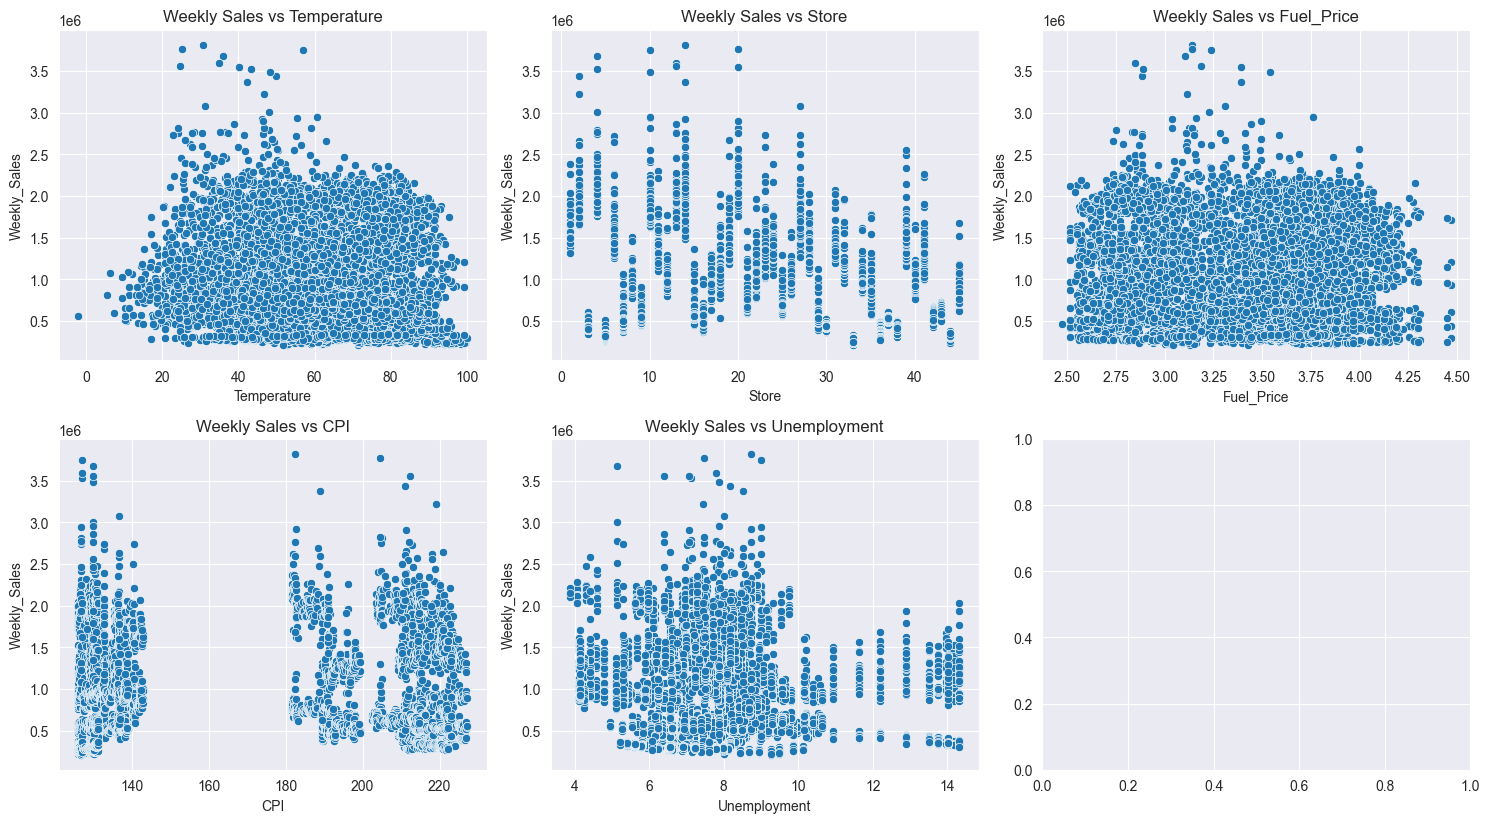

In [9]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(columns):
    if feature != "Weekly_Sales":  # Compare with "Weekly_Sales"
        sns.scatterplot(data=data, x=feature, y="Weekly_Sales", ax=axes[i])
        axes[i].set_title(f'Weekly Sales vs {feature}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: xlabel='Store'>

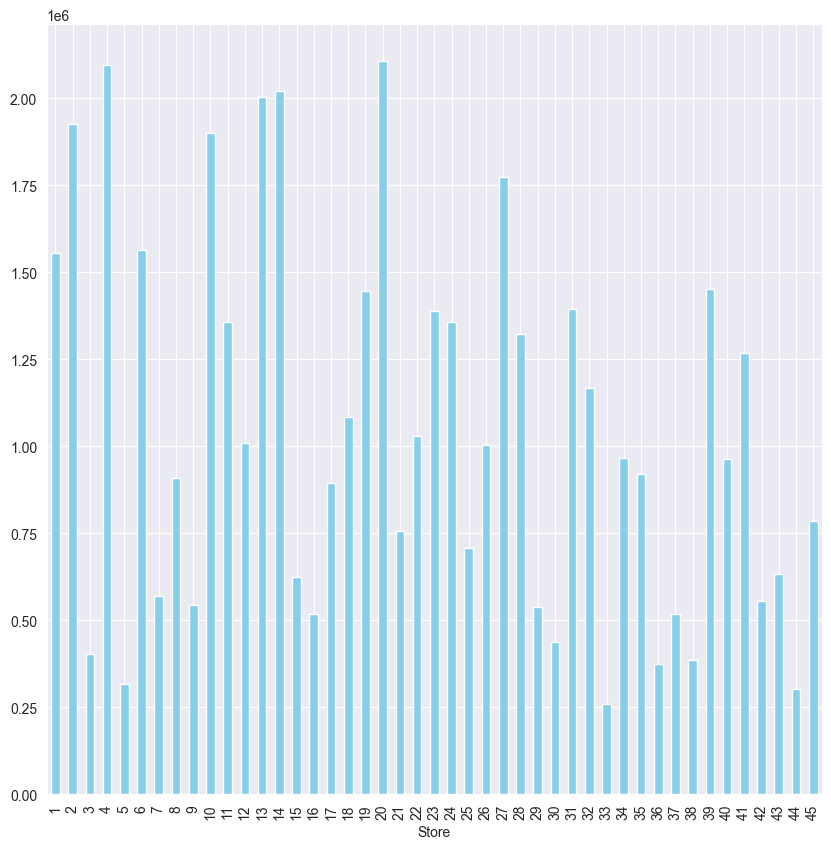

In [10]:
data.groupby('Store')['Weekly_Sales'].mean().plot(kind='bar', color='skyblue',figsize=(10,10))

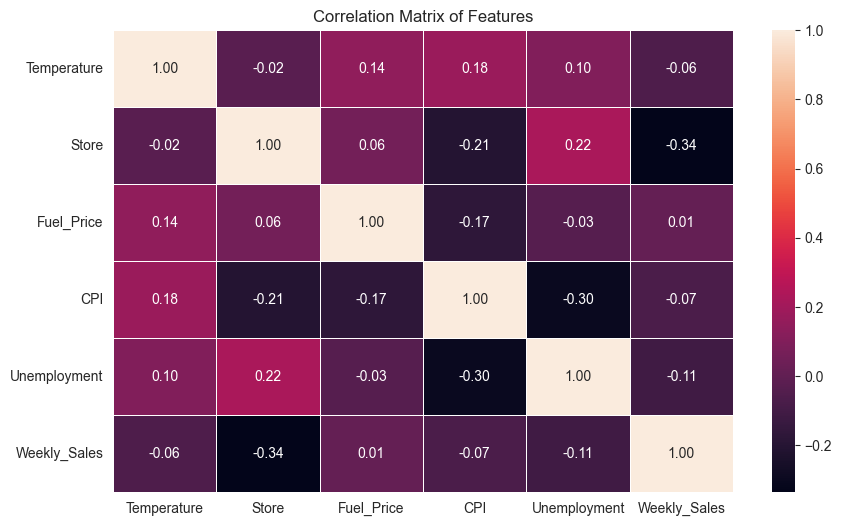

In [11]:
correlation_matrix = data[columns].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True,  fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [12]:
print("Shape of original Data:", data.shape)
def remove_outliers_series(series):

    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    series_cleaned = series[~((series < lower_bound) | (series > upper_bound))]
    return series_cleaned

for i in columns:
    data[i]=remove_outliers_series(data[i])

data=data.dropna()
print("Shape of the cleaned data:",data.shape)

Shape of original Data: (6435, 8)
Shape of the cleaned data: (5917, 8)


In [13]:

dates=data["Date"]
data=data.drop("Date",axis=1)
dates=pd.to_datetime(dates, format="%d-%m-%Y")

data=pd.get_dummies(data, columns=["Store"],drop_first=True)
data=pd.get_dummies(data, columns=["Holiday_Flag"],drop_first=True)
# data["dates"]=dates

In [14]:
scaler = StandardScaler()

X=pd.DataFrame(data.drop("Weekly_Sales", axis=1))
y=pd.DataFrame(np.array(data['Weekly_Sales']))

dates=pd.DataFrame(dates)

x_sc= pd.DataFrame(scaler.fit_transform(X))
y_sc= pd.DataFrame(scaler.fit_transform(y))

x_sc["dates"]=dates
X["dates"]=dates

In [15]:
data.head(-1)

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,Store_6,...,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_1
0,1643690.90,42.31,2.572,211.096358,8.106,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1641957.44,38.51,2.548,211.242170,8.106,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1611968.17,39.93,2.514,211.289143,8.106,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1409727.59,46.63,2.561,211.319643,8.106,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1554806.68,46.50,2.625,211.350143,8.106,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6429,723086.20,65.32,4.038,191.856704,8.684,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6430,713173.95,64.88,3.997,192.013558,8.684,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6431,733455.07,64.89,3.985,192.170412,8.667,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6432,734464.36,54.47,4.000,192.327265,8.667,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [29]:
if isinstance(x_sc, pd.DataFrame):
    x_sc = x_sc.select_dtypes(include=[np.number])


x_sc = np.hstack((np.array(x_sc), np.ones((x_sc.shape[0], 1))))
Y_predict = np.array(y_sc)

Y_predict = Y_predict.ravel()

x_train,x_test,y_train,y_test=train_test_split(x_sc,Y_predict,test_size=0.2,random_state=42)


MODEL WEIGHTS INITIALIZATION

In [30]:
for lambda_ in [0.001]:
    ones = np.ones((x_train.shape[0], 1))
    X_bias = np.hstack((ones, x_sc))
    I = np.eye(X_bias.shape[1])
    I[0, 0] = 0
    W_g = np.linalg.inv(X_bias.T @ X_bias + lambda_ * I) @ X_bias.T @ y_train

In [32]:
from linearmodel import LinearModel

lamda = [0.001, 0.01, 0.1, 10]
learning_rate = [0.001, 0.01, 0.1]

model = LinearModel()
weights,best_lambda, best_lr = model.validation(x_train, y_train,5, lamda, learning_rate)

Current learning rate, lambda: 0.001 0.001
Epoch 0, MSE: 0.9750896721982969
Epoch 1000, MSE: 0.1971033737228002
Epoch 2000, MSE: 0.09380140006635532
Epoch 3000, MSE: 0.07815520008880558
Epoch 4000, MSE: 0.07470895722864751
Epoch 5000, MSE: 0.07316479993590515
Epoch 6000, MSE: 0.07203097715100741
Epoch 7000, MSE: 0.0710334235322762
Epoch 8000, MSE: 0.07011997281360671
Epoch 9000, MSE: 0.06927426253824377
The current MSE is: 0.08171773894559362
Current learning rate, lambda: 0.001 0.001
Epoch 0, MSE: 1.0007963092607033
Epoch 1000, MSE: 0.20267044622471533
Epoch 2000, MSE: 0.09906239594380106
Epoch 3000, MSE: 0.08358968704966432
Epoch 4000, MSE: 0.08007228864133055
Epoch 5000, MSE: 0.07840577186186068
Epoch 6000, MSE: 0.07713162430994712
Epoch 7000, MSE: 0.07600230343654778
Epoch 8000, MSE: 0.07496751022492365
Epoch 9000, MSE: 0.0740105365690432
The current MSE is: 0.0590870478255081
Current learning rate, lambda: 0.001 0.001
Epoch 0, MSE: 0.9892034533183819
Epoch 1000, MSE: 0.20230156299

In [33]:
print(f"Best hyperparameters - Lambda: {best_lambda}, Learning Rate: {best_lr}")

Best hyperparameters - Lambda: 0.001, Learning Rate: 0.01


In [40]:
w_g,bias=model.gradient_descent_lasso(x_train,y_train,10000,best_lr,best_lambda)
y_pred=x_test@w_g+bias
print(r2_score(y_pred,y_test))

Current learning rate, lambda: 0.01 0.001
Epoch 0, MSE: 0.9897758085304139
Epoch 1000, MSE: 0.07049507317173269
Epoch 2000, MSE: 0.06476759400274387
Epoch 3000, MSE: 0.06203848566530717
Epoch 4000, MSE: 0.06070940911197687
Epoch 5000, MSE: 0.060036196198922386
Epoch 6000, MSE: 0.059662923677936845
Epoch 7000, MSE: 0.05947495061174431
Epoch 8000, MSE: 0.05936099430608203
Epoch 9000, MSE: 0.059289920182053354
0.9264293764804988
